In [ ]:
%pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

import matplotlib as mpl
import platform

mpl.rcParams['axes.unicode_minus'] = False

current_os = platform.system()
if current_os == 'Windows':
    plt.rcParams["font.family"] = 'Malgun Gothic'
elif current_os == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'
else:
    plt.rcParams["font.family"] = 'NanumGothic'


In [ ]:
# 경로 설정
current_dir = Path.cwd()
data_dir = current_dir.parent / 'data'
excel_file_name = '(최종) 2023 학생건강검사 데이터 공개자료.xlsx'
excel_file_path = data_dir / excel_file_name
csv_file_name = 'school_health.csv'
csv_file_path = data_dir / csv_file_name
processed_csv_name = 'school_health_preprocessed.csv'
processed_csv_path = data_dir / processed_csv_name


현재 작업 디렉토리: c:\Users\hooni\Desktop\SDA_Team5\team-project\src
데이터 디렉토리: c:\Users\hooni\Desktop\SDA_Team5\team-project\data
Excel 파일 경로: c:\Users\hooni\Desktop\SDA_Team5\team-project\data\(최종) 2023 학생건강검사 데이터 공개자료.xlsx
CSV 파일 경로: c:\Users\hooni\Desktop\SDA_Team5\team-project\data\school_health.csv
전처리된 CSV 파일 경로: c:\Users\hooni\Desktop\SDA_Team5\team-project\data\school_health_preprocessed.csv


In [ ]:
# Excel 파일을 CSV로 변환
try:
    if not excel_file_path.exists():
        raise FileNotFoundError(f"Excel 파일을 찾을 수 없습니다: {excel_file_path}")
    excel_data = pd.read_excel(excel_file_path, sheet_name=0)
    excel_data.to_csv(csv_file_path, index=False, encoding='utf-8-sig')
    print(f"Excel 파일이 성공적으로 CSV로 변환되었습니다: {csv_file_path}")
except FileNotFoundError as fnf_error:
    print(f"파일 변환 중 오류 발생: {fnf_error}")
except Exception as e:
    print(f"파일 변환 중 오류 발생: {e}")


Excel 파일이 성공적으로 CSV로 변환되었습니다: c:\Users\hooni\Desktop\SDA_Team5\team-project\data\school_health.csv


In [ ]:
# CSV 파일 불러오기
try:
    if not csv_file_path.exists():
        raise FileNotFoundError(f"CSV 파일을 찾을 수 없습니다: {csv_file_path}")
    
    df = pd.read_csv(csv_file_path, encoding='utf-8-sig')
    print("CSV 파일이 성공적으로 로드되었습니다.")
    print("\n데이터 샘플:")
    print(df.head())
    
    columns_needed = ['키', '몸무게']
    missing_cols = [col for col in columns_needed if col not in df.columns]
    if missing_cols:
        print(f"필요한 컬럼이 누락되었습니다: {missing_cols}")
    else:
        df = df[columns_needed]
        print("\n필요한 컬럼만 선택되었습니다.")
        print(df.head())
    
    print("\n데이터 정보:")
    print(df.info())
    
    # 'BMI' 컬럼 추가
    if '키' in df.columns and '몸무게' in df.columns:
        df['키_m'] = df['키'] / 100
        
        # BMI 계산: 체중(kg) / (키(m))^2
        df['BMI'] = df['몸무게'] / (df['키_m'] ** 2)
        print("\n'BMI' 컬럼이 추가되었습니다.")
        print(df[['키', '몸무게', 'BMI']].head())
    else:
        print("'키' 또는 '몸무게' 컬럼이 존재하지 않아 'BMI' 컬럼을 추가할 수 없습니다.")
except FileNotFoundError as fnf_error:
    print(f"파일 로드 중 오류 발생: {fnf_error}")
    df = pd.DataFrame()
except Exception as e:
    print(f"파일 로드 중 오류 발생: {e}")
    df = pd.DataFrame()


CSV 파일이 성공적으로 로드되었습니다.

데이터 샘플:
    학년도       최종가중치  학교ID    도시규모  공학여부  시도 학교급  학년  반  순번  ... 가족흡연 가족음주  \
0  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   1  ...  2.0  2.0   
1  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   2  ...  2.0  2.0   
2  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   3  ...  2.0  2.0   
3  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   4  ...  1.0  2.0   
4  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   5  ...  1.0  2.0   

  흡연음주전문가상담희망  무기력감  수업태도교정 과잉행동  주의력산만  성문제전문가상담희망  진로고민  상담요청  
0         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
1         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
2         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
3         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
4         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  

[5 rows x 109 columns]

필요한 컬럼만 선택되었습니다.
            키        몸무게
0  110.699997  19.200001
1  112.500000  19

In [ ]:
# 'BMI' 컬럼의 이상치 제거 - IQR
if 'BMI' in df.columns:
    print("\nBMI 기술 통계량:")
    print(df['BMI'].describe())
    
    Q1 = df['BMI'].quantile(0.25)
    Q3 = df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    
    print(f"\nIQR 계산:")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\n이상치 제거 기준:")
    print(f"하한: {lower_bound}")
    print(f"상한: {upper_bound}")
    
    df_clean = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]
    
    print(f"\n이상치 제거 전: {df.shape[0]} 행")
    print(f"이상치 제거 후: {df_clean.shape[0]} 행")
else:
    print("'BMI' 컬럼이 존재하지 않습니다.")
    df_clean = df.copy()



BMI 기술 통계량:
count    87182.000000
mean        20.912859
std          4.567824
min          5.159914
25%         17.609699
50%         20.210228
75%         23.340601
max         45.782581
Name: BMI, dtype: float64

IQR 계산:
Q1: 17.609699331773474
Q3: 23.34060142835836
IQR: 5.730902096584888

이상치 제거 기준:
하한: 9.013346186896142
상한: 31.936954573235695

이상치 제거 전: 87182 행
이상치 제거 후: 84871 행


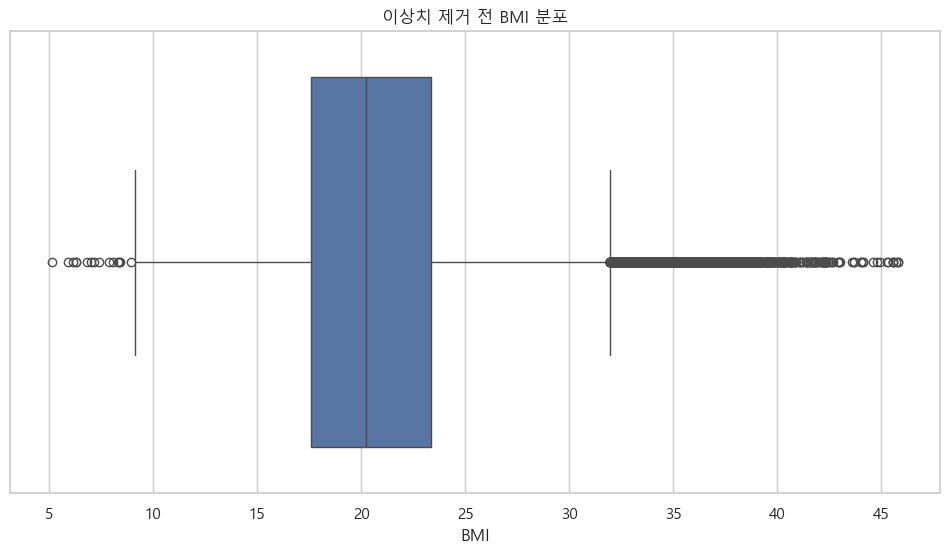

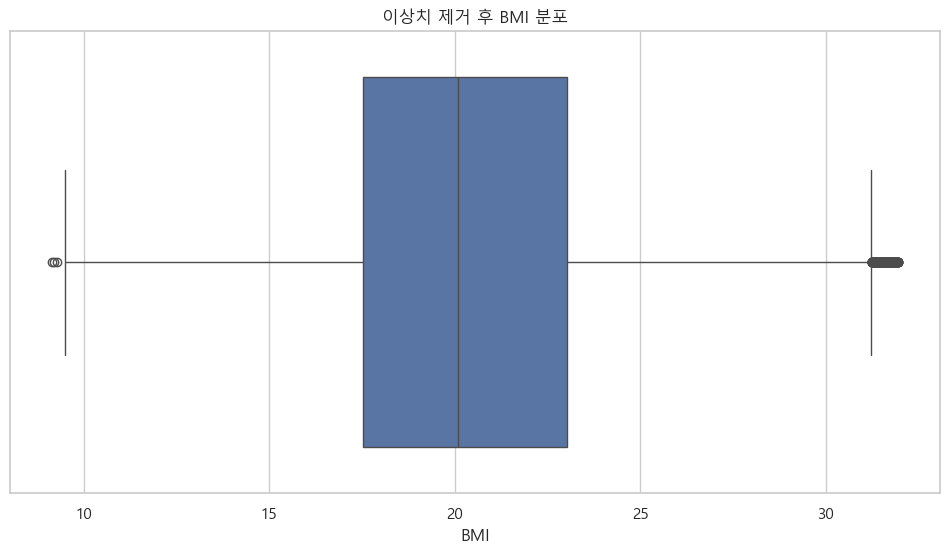

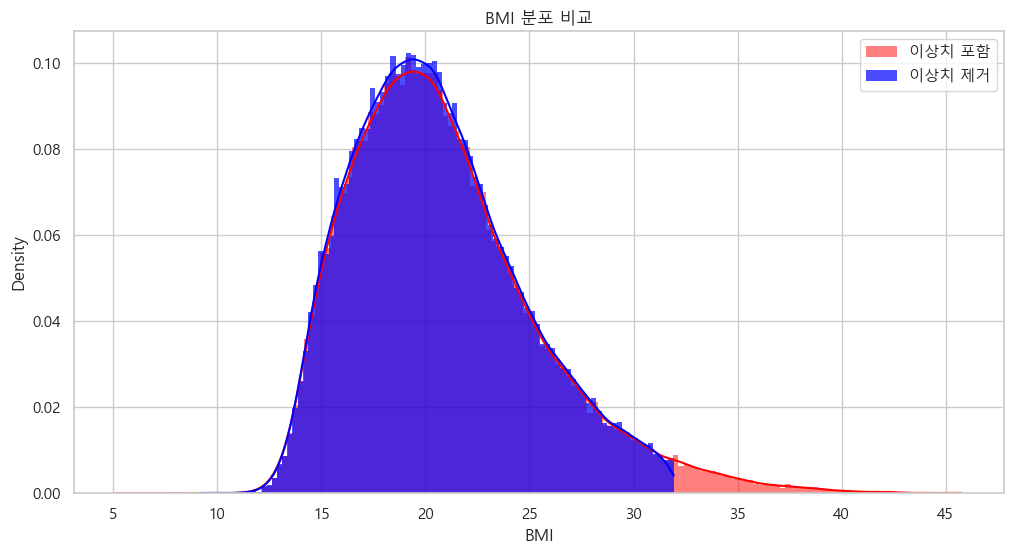

In [ ]:
# 이상치 제거 후 BMI 분포 시각화
if 'BMI' in df.columns:
    # 이상치 제거 전 BMI 분포
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['BMI'])
    plt.title('이상치 제거 전 BMI 분포')
    plt.xlabel('BMI')
    plt.show()
    
    # 이상치 제거 후 BMI 분포
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_clean['BMI'])
    plt.title('이상치 제거 후 BMI 분포')
    plt.xlabel('BMI')
    plt.show()
    
    # BMI 히스토그램 비교
    plt.figure(figsize=(12, 6))
    sns.histplot(df['BMI'], kde=True, color='red', label='이상치 포함', stat="density", linewidth=0)
    sns.histplot(df_clean['BMI'], kde=True, color='blue', label='이상치 제거', stat="density", linewidth=0, alpha=0.7)
    plt.title('BMI 분포 비교')
    plt.xlabel('BMI')
    plt.legend()
    plt.show()


In [ ]:
# 전처리된 데이터 저장
if not df_clean.empty:
    try:
        df_clean.to_csv(processed_csv_path, index=False, encoding='utf-8-sig')
        print(f"\n전처리된 데이터가 성공적으로 저장되었습니다: {processed_csv_path}")
    except Exception as e:
        print(f"데이터 저장 중 오류 발생: {e}")
else:
    print("전처리된 데이터가 비어 있어 저장하지 않습니다.")



전처리된 데이터가 성공적으로 저장되었습니다: c:\Users\hooni\Desktop\SDA_Team5\team-project\data\school_health_preprocessed.csv


In [16]:
# 10. 전처리된 데이터 로드 및 확인
try:
    df_final = pd.read_csv(processed_csv_path, encoding='utf-8-sig')
    print("\n전처리된 데이터 샘플:")
    print(df_final.head())
    
    print("\n전처리된 데이터 정보:")
    print(df_final.info())
    
    print("\n전처리된 데이터 기술 통계량:")
    print(df_final.describe())
except FileNotFoundError:
    print(f"전처리된 데이터를 찾을 수 없습니다: {processed_csv_path}")
except Exception as e:
    print(f"전처리된 데이터 로드 중 오류 발생: {e}")



전처리된 데이터 샘플:
            키        몸무게    키_m        BMI
0  110.699997  19.200001  1.107  15.667728
1  112.500000  19.799999  1.125  15.644444
2  125.300003  23.799999  1.253  15.159148
3  116.099998  30.600000  1.161  22.701628
4  119.400002  21.200001  1.194  14.870556

전처리된 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84871 entries, 0 to 84870
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   키       84871 non-null  float64
 1   몸무게     84871 non-null  float64
 2   키_m     84871 non-null  float64
 3   BMI     84871 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB
None

전처리된 데이터 기술 통계량:
                  키           몸무게           키_m           BMI
count  84871.000000  84871.000000  84871.000000  84871.000000
mean     154.250488     50.442908      1.542505     20.539189
std       16.905163     17.047186      0.169052      3.982144
min      103.000000     13.600000      1.030000      9.156045
25%      14